In [1]:
import numpy as np
import matplotlib.pyplot as plt

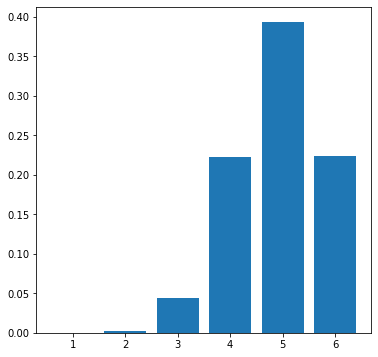

The greatest influence on the error has b_5
Vector d = [1.4227340159743037e-05, 0.002458281201822218, 0.044530417947518594, 0.22188869703656877, 0.39304077475900123, 0.22323844180828958]
The inequality delta(x^m) <= cond(A) * delta(b^m) is fulfilled: 0.39304077475900123 <= 45807660729.06723


In [9]:
b = np.full(6, fill_value=8, dtype=float)

A = np.zeros((6, 6))
C = np.zeros((6, 6))
for i in range(6):
    for j in range(6):
        C[i, j] = 0.1 * 8 * (i + 1) * (j + 1)
        A[i, j] = 1 / (C[i,j]**2 + 0.58 * C[i, j])

x = np.linalg.solve(A, b)
cond_value = np.linalg.cond(np.abs(A), p=np.inf)

delta = 0.08
new_x = np.empty((6, 6))
for i in range(6):
    new_b = b.copy()
    new_b[i] += delta
    new_x[i] = np.linalg.solve(A, new_b)

d = []
for i in new_x:
    d.append(np.linalg.norm(x - i, ord=np.inf) / np.linalg.norm(x, ord=np.inf))

plt.figure(figsize=(6, 6))
plt.bar(range(1, 7), d)
plt.show()

new_b = b.copy()
new_b[np.argmax(d)] += delta

delta_b = (np.linalg.norm(new_b - b, ord=np.inf) / np.linalg.norm(b, ord=np.inf))
print(f'The greatest influence on the error has b_{np.argmax(d) + 1}')
print(f'Vector d = {d}')
print(f'The inequality delta(x^m) <= cond(A) * delta(b^m) is fulfilled: {d[np.argmax(d)]} <= {delta_b * cond_value}')

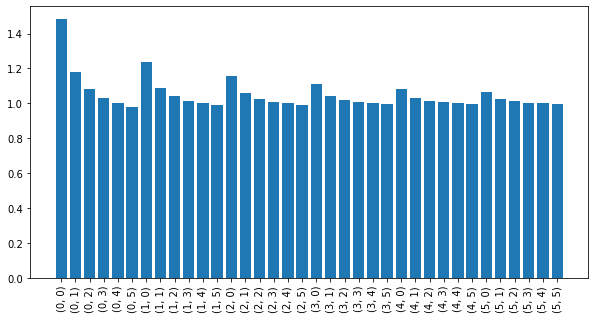

The greatest influence on the error has element on position: (0, 0)
The inequality delta(x^*) <= cond(A) * delta(A^*) is fulfilled: 1.4821367200256994 <= 242963747017.2493


In [18]:
b = np.full(6, fill_value=8, dtype=float)

A = np.zeros((6, 6))
C = np.zeros((6, 6))
for i in range(6):
    for j in range(6):
        C[i, j] = 0.1 * 8 * (i + 1) * (j + 1)
        A[i, j] = 1 / (C[i,j]**2 + 0.58 * C[i, j])

x = np.linalg.solve(A, b)
cond_value = np.linalg.cond(A, p=np.inf)

delta = 0.08
new_x = {}
for i in range(6):
    for j in range(6):
        new_A = A.copy()
        new_A[i, j] += delta
        new_x[(i, j)] = np.linalg.solve(new_A, b)

d = {key: np.linalg.norm(x - x_i, ord=np.inf) / np.linalg.norm(x, ord=np.inf) for key, x_i in new_x.items()}

plt.figure(figsize=(10, 5))
plt.bar([str(i) for i in d.keys()], d.values())
plt.xticks(rotation=90)
plt.show()

d_i, d_j = max(d, key=d.get)
new_A = A.copy()
new_A[d_i, d_j] += delta
delta_A = (np.linalg.norm(new_A - A, ord=np.inf) / np.linalg.norm(A, ord=np.inf))

print(f'The greatest influence on the error has element on position: {d_i, d_j}')
print(f'The inequality delta(x^*) <= cond(A) * delta(A^*) is fulfilled: {d[(d_i, d_j)]} <= {delta_A * cond_value}')